# Miguel Ángel García Ruíz

# Taller 5: Comparación Data-MC

# An introductional notebook to HEP analysis in C++

<p>In this notebook you can find an easy set of commands that show some basic computing techniques commonly used in High Energy Physics (HEP) analyzes.</p>

<p>It also shows how to create an histogram, fill it and draw it. Moreover it is an introduction to [ROOT](https://root.cern.ch/) too. The final output is a plot with the number of leptons.</p>

Based on ATLAS opendata notebooks (http://opendata.atlas.cern/release/2020/documentation/notebooks/intro.html)


The library used is [ROOT](https://root.cern.ch/), a scientific data analysis software framework that provides a large set of functionalities needed to deal with big data processing, statistical analysis, visualisation and storage.

<p>At first we have to include several helpers that will support our analysis:</p>

In [1]:
import ROOT
from ROOT import TMath

Welcome to JupyROOT 6.24/06


Next we have to open the data that we want to analyze. As described above the data is stored in a _*.root_ file. This is a root file containing tracks and calorimeter clusters

In [2]:
data_file = ROOT.TFile.Open("http://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TTbarSel/Data_8TeV.root"); 
mc_file = ROOT.TFile.Open("http://csandova.web.cern.ch/csandova/HEP-Ex-Course/Code/TTbarSel/ttbar_8TeV.root");

The next step is to define a tree named _tree_ to get the data out of the _*.root_ file. The tree in this root file is called "JetRecoTree". We will then print the contents of the tree to find the names of the variables. 

In [3]:
data_tree = data_file.Get("mini")
data_tree.Print()

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries : 14945674 : Total =      3737586466 bytes  File  Size = 1366006484 *
*        :          : Tree compression factor =   2.74                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries : 14945674 : Total  Size=   59789737 bytes  File Size  =     297928 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression= 200.68     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries : 14945674 : Total  Size=   59789885 bytes  File Size  =   44412272 *
*Baskets :       70 : Basket Size=    1224192 bytes  Compression=   1.35     *
*...................................................

In [4]:
mc_tree = mc_file.Get("mini")
mc_tree.Print()

******************************************************************************
*Tree    :mini      : 4-vectors + variables required for scaling factors     *
*Entries :  1500000 : Total =       567791759 bytes  File  Size =  300057248 *
*        :          : Tree compression factor =   1.89                       *
******************************************************************************
*Br    0 :runNumber : runNumber/I                                            *
*Entries :  1500000 : Total  Size=    6002049 bytes  File Size  =      31136 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression= 192.75     *
*............................................................................*
*Br    1 :eventNumber : eventNumber/I                                        *
*Entries :  1500000 : Total  Size=    6002093 bytes  File Size  =    3819950 *
*Baskets :       18 : Basket Size=     790016 bytes  Compression=   1.57     *
*...................................................

Create Canvas

In [5]:
canvas = ROOT.TCanvas("Canvas","c",800,600)

Create histograms: Leading jet pT and all jets pT 

In [6]:
data_cutflow = ROOT.TH1F("Data Cutflow","Cutflow; Cut; Events",10,0,10)
data_hist_leptons_pT = ROOT.TH1F("Data Leptons pT", "Leptons pT Distribution; pT [GeV]; Events", 130, 0, 130)
data_hist_lep_track_isolation = ROOT.TH1F("Data Track isolation", "Track Isolation Distribution; track isolation; Events", 100, 0, 0.5)
data_hist_lep_calor_isolation = ROOT.TH1F("Data Calorimeter isolation", "Calorimeter Isolation Distribution; calorimeter isolation; Events", 100, 0, 0.5)
data_hist_lep_eta = ROOT.TH1F("Data Lepton eta", "Lepton #eta Distribution; #eta; Events", 100, -3, 3)
data_hist_njets = ROOT.TH1F("Data Number of jets","n-jets; Jet multiplicity; Events",4,4,8)
data_hist_jets_pT = ROOT.TH1F("Data Jets pT", "Jets pT Distribution; pT [GeV]; Events", 100, 0, 200)
data_hist_jets_eta = ROOT.TH1F("Data Jets eta", "Jets #eta Distribution; #eta; Events", 100, -3, 3)
data_hist_jets_jvf = ROOT.TH1F("Data Jets jvf", "JVF Distribution; jvf; Events", 100, 0, 1)
data_hist_jets_mv1 = ROOT.TH1F("Data Jets MV1", "Jets MV1 Distribution; mv1; Events", 100, 0, 1)
data_hist_bjets = ROOT.TH1F("Data bjets", "b-Jets Distribution; b-jets; Events", 5, 0, 5)
data_hist_MET = ROOT.TH1F("Data MET hist", "MET Distribution; MET [GeV]; Events", 100, 0, 200)
data_hist_mTw = ROOT.TH1F("Data mTW hist", "mT(W) Distribution; mT(W) [GeV]; Events", 100, 0, 200)

In [7]:
mc_cutflow = ROOT.TH1F("MC Cutflow","Cutflow; Cut; Events",10,0,10)
mc_hist_leptons_pT = ROOT.TH1F("MC Leptons pT", "Leptons pT Distribution; pT [GeV]; Events", 130, 0, 130)
mc_hist_lep_track_isolation = ROOT.TH1F("MC Track isolation", "Track Isolation Distribution; ; Events", 100, 0, 0.5)
mc_hist_lep_calor_isolation = ROOT.TH1F("MC Calorimeter isolation", "Calorimeter Isolation Distribution; ; Events", 100, 0, 0.5)
mc_hist_lep_eta = ROOT.TH1F("MC Lepton eta", "Lepton #eta Distribution; ; Events", 100, -3, 3)
mc_hist_njets = ROOT.TH1F("MC Number of jets","n-jets; Jet multiplicity; Events",4,4,8)
mc_hist_jets_pT = ROOT.TH1F("MC Jets pT", "Jets pT Distribution; pT [GeV]; Events", 100, 0, 200)
mc_hist_jets_eta = ROOT.TH1F("MC Jets eta", "Jets #eta Distribution; #eta; Events", 100, -3, 3)
mc_hist_jets_jvf = ROOT.TH1F("MC Jets jvf", "JVF Distribution; jvf; Events", 100, 0, 1)
mc_hist_jets_mv1 = ROOT.TH1F("MC Jets MV1", "Jets MV1 Distribution; mv1; Events", 100, 0, 1)
mc_hist_bjets = ROOT.TH1F("MC bjets", "b-Jets Distribution; b-jets; Events", 5, 0, 5)
mc_hist_MET = ROOT.TH1F("MC MET hist", "MET Distribution; MET [GeV]; Events", 100, 0, 200)
mc_hist_mTw = ROOT.TH1F("MC mTW hist", "mT(W) Distribution; mT(W) [GeV]; Events", 100, 0, 200)

Loop and fill histograms

In [8]:
data_cut1 = 0
data_cut2 = 0
data_cut3 = 0
data_cut4 = 0
data_cut5 = 0
data_cut6 = 0
data_cut7 = 0
data_cut8 = 0


for event in data_tree:
    #First cut: Good vertex
    if(data_tree.hasGoodVertex!=True): continue
    data_cut1+=1
    data_cutflow.Fill(1)

    #Second cut: Trigger
    if(data_tree.trigE!=True and data_tree.trigM!=True): continue
    data_cut2+=1
    data_cutflow.Fill(2)
        
    # Preselection of good leptons                                                                                
    data_n_mu=0
    data_n_el=0
    data_n_lep=0
    data_goodlep_index=0 #unsigned int
    
    #Loop over leptons
    for i in range (data_tree.lep_n):
        if( data_tree.lep_pt[i] < 25000.): continue
        if( data_tree.lep_ptcone30[i]/data_tree.lep_pt[i] > 0.15 ): continue
        if( data_tree.lep_etcone20[i]/data_tree.lep_pt[i] > 0.15 ): continue 
        if( data_tree.lep_type[i]==13 and TMath.Abs(data_tree.lep_eta[i]) < 2.5 ):
            data_n_mu+=1
        #To complete: Add electrons and extract the index for the good lepton
        if( data_tree.lep_type[i]==11 and TMath.Abs(data_tree.lep_eta[i]) < 2.47 and
           (TMath.Abs(data_tree.lep_eta[i]) < 1.37 or TMath.Abs(data_tree.lep_eta[i]) > 1.52) ):
            data_n_el+=1
        
        # Fill histogram distribution of lepton pT
        data_goodlep_index=i
        data_n_lep+=1
        
    
    # Select events with only 1 good lepton and fill the cutflow histogram 
    # Example:
    # Third cut (one good lepton):
    if(data_n_lep!=1): continue
    data_cutflow.Fill(3)
    data_cut3+=1
    
    data_n_goodjets = 0
    data_n_bjets = 0
    
    # Fourth cut: At least 4 jets
    if(data_tree.jet_n<4): continue
    data_cutflow.Fill(4)
    data_cut4+=1
    
    # Number of jets distribution
    data_hist_njets.Fill(data_tree.jet_n)

    for j in range (data_tree.jet_n):
        # To complete: apply jet cuts to find the good jets
        # pT cut
        if(data_tree.jet_pt[j] <= 25000.): continue
        
        # Eta cut
        if(TMath.Abs(data_tree.jet_eta[j]) >= 2.5): continue
        
        # JVF cleaning    
        # pT<50GeV => (|eta|<2.4 and |JVF|>0.5)
        if(data_tree.jet_pt[j] < 50000.):
            if(TMath.Abs(data_tree.jet_eta[j]) >= 2.4 or TMath.Abs(data_tree.jet_jvf[j]) <= 0.5): continue
        
        data_n_goodjets+=1
        
        # cut on 0.7892 MV1 and count the number of b-jets
        if(data_tree.jet_MV1[j] < 0.7892): continue
        data_n_bjets+=1
    
    
    # Fifth cut: At least 4 good jets
    if(data_n_goodjets<4): continue 
    data_cutflow.Fill(5)
    data_cut5+=1
    
    # Sixth cut: at least two b-jet
    if(data_n_bjets<2): continue

    # cutflow
    data_cutflow.Fill(6)
    data_cut6+=1
    
    # Seventh cut: MET > 30 GeV
    if(data_tree.met_et<30000.): continue

    # cutflow
    data_cutflow.Fill(7)
    data_cut7+=1
    
    # TLorentzVector definitions                                                               
    data_Lepton = ROOT.TLorentzVector()
    data_MeT = ROOT.TLorentzVector()

    # To complete: Lorentz vectors for the lepton and MET. Use SetPtEtaPhiE().
    
    data_Lepton.SetPtEtaPhiE(data_tree.lep_pt[data_goodlep_index], data_tree.lep_eta[data_goodlep_index], 
                             data_tree.lep_phi[data_goodlep_index], data_tree.lep_E[data_goodlep_index])

    data_MeT.SetPtEtaPhiE(data_tree.met_et, 0, data_tree.met_phi , data_tree.met_et)
    
    # Calculation of the mTW using TLorentz vectors             
    data_mTW = TMath.Sqrt(2*data_Lepton.Pt()*data_MeT.Et()*(1-TMath.Cos(data_Lepton.DeltaPhi(data_MeT))))

    # Eight cut: mTW > 30 GeV
   
    if(data_mTW <= 30000.): continue
    data_cutflow.Fill(8)
    data_cut8+=1
    
print("All events               \t: "+str(data_tree.GetEntries()))
print("Cut1: One good vertex:   \t"+str(data_cut1))
print("Cut2: Trigger 1 lep:     \t"+str(data_cut2))
print("Cut3: 1 good lepton:     \t"+str(data_cut3))
print("Cut4: At leats 4 jets:   \t"+str(data_cut4))
print("Cut5: At least 4 gjets:  \t"+str(data_cut5))
print("Cut6: At least 2 b jets: \t"+str(data_cut6))
print("Cut7: MET > 30 GeV:      \t"+str(data_cut7))
print("Cut8: mTW > 30 GeV:      \t"+str(data_cut8))
print("Done!")

All events               	: 14945674
Cut1: One good vertex:   	14656440
Cut2: Trigger 1 lep:     	14656440
Cut3: 1 good lepton:     	11561801
Cut4: At leats 4 jets:   	61995
Cut5: At least 4 gjets:  	59797
Cut6: At least 2 b jets: 	10655
Cut7: MET > 30 GeV:      	8451
Cut8: mTW > 30 GeV:      	7093
Done!


<p>Draw</p>

In [9]:
red_eff = 0.072212854
xsec = 0.13729749 #fb
N_mc = 49973332
data_lumi = 1 #fb^-1
mc_lumi = N_mc*red_eff/xsec

weight = data_lumi/mc_lumi

print("mc_weight: \t"+str(mc_lumi))
print("weight: \t"+str(weight))

mc_weight: 	26283924.983694375
weight: 	3.8046068105138974e-08


In [15]:
mc_cut1 = 0
mc_cut2 = 0
mc_cut3 = 0
mc_cut4 = 0
mc_cut5 = 0
mc_cut6 = 0
mc_cut7 = 0
mc_cut8 = 0


for event in mc_tree:
    
    # Computing the total event weight
    
    ScaleFactor = mc_tree.scaleFactor_PILEUP*mc_tree.scaleFactor_ELE*mc_tree.scaleFactor_MUON*mc_tree.scaleFactor_BTAG
    ScaleFactor*=mc_tree.scaleFactor_TRIGGER*mc_tree.scaleFactor_JVFSF*mc_tree.scaleFactor_ZVERTEX
    total_evtw = ScaleFactor*mc_tree.mcWeight*weight; #Scale Factors times montecarlo evtw times weight by luminosity division

    if(total_evtw == 0.): total_evtw = 1.0;
    #First cut: Good vertex
    if(mc_tree.hasGoodVertex!=True): continue
    mc_cut1+=1
    mc_cutflow.Fill(1, total_evtw)

    #Second cut: Trigger
    if(mc_tree.trigE!=True and mc_tree.trigM!=True): continue
    mc_cut2+=1
    mc_cutflow.Fill(2, total_evtw)
        
    # Preselection of good leptons                                                                                
    mc_n_mu=0
    mc_n_el=0
    mc_n_lep=0
    mc_goodlep_index=0 #unsigned int
    
    #Loop over leptons
    for i in range (mc_tree.lep_n):
        if( mc_tree.lep_pt[i] < 25000.): continue
        if( mc_tree.lep_ptcone30[i]/mc_tree.lep_pt[i] > 0.15 ): continue
        if( mc_tree.lep_etcone20[i]/mc_tree.lep_pt[i] > 0.15 ): continue 
        if( mc_tree.lep_type[i]==13 and TMath.Abs(mc_tree.lep_eta[i]) < 2.5 ):
            mc_n_mu+=1
        #To complete: Add electrons and extract the index for the good lepton
        if( mc_tree.lep_type[i]==11 and TMath.Abs(mc_tree.lep_eta[i]) < 2.47 and
           (TMath.Abs(mc_tree.lep_eta[i]) < 1.37 or TMath.Abs(mc_tree.lep_eta[i]) > 1.52) ):
            mc_n_el+=1
        
        # Fill histogram distribution of lepton pT
        mc_goodlep_index=i
        mc_n_lep+=1
        
    # Select events with only 1 good lepton and fill the cutflow histogram 
    # Example:
    # Third cut (one good lepton):
    if(mc_n_lep!=1): continue
    mc_cutflow.Fill(3, total_evtw)
    mc_cut3+=1
    
    mc_n_goodjets = 0
    mc_n_bjets = 0
    
    # Fourth cut: At least 4 jets
    if(mc_tree.jet_n<4): continue
    mc_cutflow.Fill(4, total_evtw)
    mc_cut4+=1
    
    # Number of jets distribution
    mc_hist_njets.Fill(mc_tree.jet_n, total_evtw)

    for j in range (mc_tree.jet_n):
        # To complete: apply jet cuts to find the good jets
        # pT cut
        if(mc_tree.jet_pt[j] <= 25000.): continue
        
        # Eta cut
        if(TMath.Abs(mc_tree.jet_eta[j]) >= 2.5): continue
        
        # JVF cleaning    
        # pT<50GeV => (|eta|<2.4 and |JVF|>0.5)
        if(mc_tree.jet_pt[j] < 50000.):
            if(TMath.Abs(mc_tree.jet_eta[j]) >= 2.4 or TMath.Abs(mc_tree.jet_jvf[j]) <= 0.5): continue
        
        mc_n_goodjets+=1
        
        # cut on 0.7892 MV1 and count the number of b-jets
        if(mc_tree.jet_MV1[j] < 0.7892): continue
        mc_n_bjets+=1
    
    
    # Fifth cut: At least 4 good jets
    if(mc_n_goodjets<4): continue 
    mc_cutflow.Fill(5, total_evtw)
    mc_cut5+=1
    
    # Sixth cut: at least two b-jet
    if(mc_n_bjets<2): continue

    # cutflow
    mc_cutflow.Fill(6, total_evtw)
    mc_cut6+=1
    
    # Seventh cut: MET > 30 GeV
    if(mc_tree.met_et<30000.): continue

    # cutflow
    mc_cutflow.Fill(7, total_evtw)
    mc_cut7+=1
    
    # TLorentzVector definitions                                                               
    mc_Lepton = ROOT.TLorentzVector()
    mc_MeT = ROOT.TLorentzVector()

    # To complete: Lorentz vectors for the lepton and MET. Use SetPtEtaPhiE().
    
    mc_Lepton.SetPtEtaPhiE(mc_tree.lep_pt[mc_goodlep_index], mc_tree.lep_eta[mc_goodlep_index], 
                             mc_tree.lep_phi[mc_goodlep_index], mc_tree.lep_E[mc_goodlep_index])

    mc_MeT.SetPtEtaPhiE(mc_tree.met_et, 0, mc_tree.met_phi , mc_tree.met_et)
    
    # Calculation of the mTW using TLorentz vectors             
    mc_mTW = TMath.Sqrt(2*mc_Lepton.Pt()*mc_MeT.Et()*(1-TMath.Cos(mc_Lepton.DeltaPhi(mc_MeT))))

    # Eight cut: mTW > 30 GeV
   
    if(mc_mTW <= 30000.): continue
    mc_cutflow.Fill(8, total_evtw)
    mc_cut8+=1
    
print("All events:              \t"+str(mc_tree.GetEntries()))
print("Cut1: One good vertex:   \t"+str(mc_cut1))
print("Cut2: Trigger 1 lep:     \t"+str(mc_cut2))
print("Cut3: 1 good lepton:     \t"+str(mc_cut3))
print("Cut4: At leats 4 jets:   \t"+str(mc_cut4))
print("Cut5: At least 4 gjets:  \t"+str(mc_cut5))
print("Cut6: At least 2 b jets: \t"+str(mc_cut6))
print("Cut7: MET > 30 GeV:      \t"+str(mc_cut7))
print("Cut8: mTW > 30 GeV:      \t"+str(mc_cut8))
print("Done!")

All events:              	1500000
Cut1: One good vertex:   	1499487
Cut2: Trigger 1 lep:     	1499487
Cut3: 1 good lepton:     	1339289
Cut4: At leats 4 jets:   	624850
Cut5: At least 4 gjets:  	614085
Cut6: At least 2 b jets: 	257355
Cut7: MET > 30 GeV:      	212432
Cut8: mTW > 30 GeV:      	179185
Done!


Info in <TCanvas::Print>: pdf file cutflowpython.pdf has been created


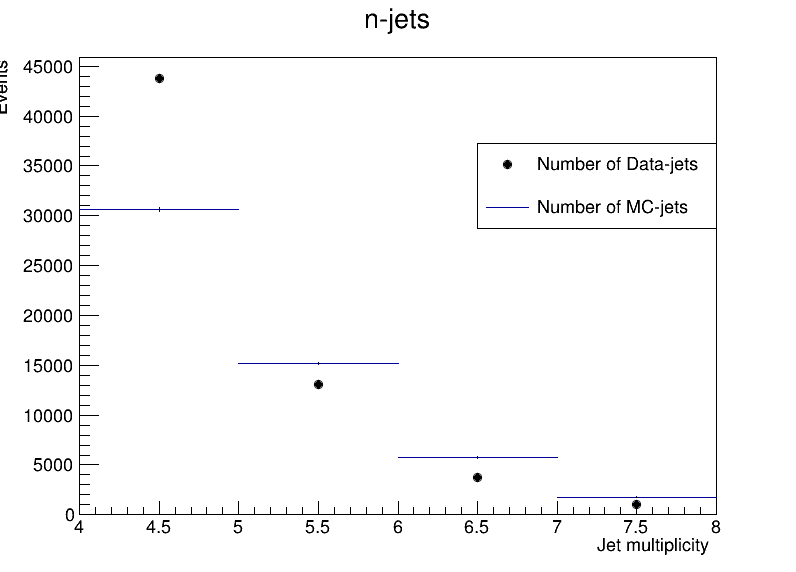

In [19]:
#data_cutflow.Draw("")
#mc_cutflow.Draw("same")
leg1 = ROOT.TLegend(0.6, 0.6, 0.9, 0.75)

data_hist_njets.SetMarkerStyle(20)
#data_hist_njets.SetMarkerColor(kBlack)
data_hist_njets.SetStats(0)
mc_hist_njets.SetFillStyle(1003)
#mc_hist_njets.SetFillColor(Blue)
mc_hist_njets.SetStats(0)
data_hist_njets.Draw("P")
mc_hist_njets.Draw("same")
leg1.AddEntry(data_hist_njets, "Number of Data-jets", "p")
leg1.AddEntry(mc_hist_njets, "Number of MC-jets", "l")
leg1.Draw()

canvas.Draw()
canvas.Print("cutflowpython.pdf")